In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [21]:
data = pd.read_csv("C:/Users/HP/Desktop/GreenAIWorkshop/environmental factors.csv")

In [22]:
data.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [23]:
data .tail()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
9995,32.153120,82.622318,24.045509,389.315259,660.200681,96.614073
9996,32.950177,32.808837,19.956484,394.037121,303.574216,37.323996
9997,33.934158,48.221908,5.389117,171.306244,774.095576,30.467486
9998,22.949760,56.599200,13.020097,245.443897,568.909821,40.736253
9999,19.342808,40.335889,10.147960,269.340664,875.536039,52.283339


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       10000 non-null  float64
 1   humidity          10000 non-null  float64
 2   wind_speed        10000 non-null  float64
 3   carbon_emissions  10000 non-null  float64
 4   solar_irradiance  10000 non-null  float64
 5   pollution_level   10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [25]:
data.shape

(10000, 6)

In [26]:
data.describe(include='all')

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.883191,60.271793,15.001008,274.421022,547.177425,50.314459
std,5.752603,17.357673,5.735475,130.047566,260.355761,28.834129
min,15.000233,30.009465,5.000962,50.002492,100.015063,0.000843
25%,19.926577,45.236748,10.074958,161.085762,319.845000,25.695648
50%,24.850572,60.353807,15.041362,275.013608,544.345473,50.609039
75%,29.800127,75.388753,19.893477,386.202314,775.429330,75.344597
max,34.994353,89.995490,24.998020,499.905217,999.974933,99.993970


In [27]:
data.isnull().sum()

temperature         0
humidity            0
wind_speed          0
carbon_emissions    0
solar_irradiance    0
pollution_level     0
dtype: int64

In [28]:
data.isnull().sum().sum()

np.int64(0)

In [29]:
data.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['temperature', 'humidity', 'wind_speed', 'carbon_emissions',
        'solar_irradiance', 'pollution_level'],
       dtype='object')]

In [30]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'carbon_emissions',
       'solar_irradiance', 'pollution_level'],
      dtype='object')

In [36]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954  


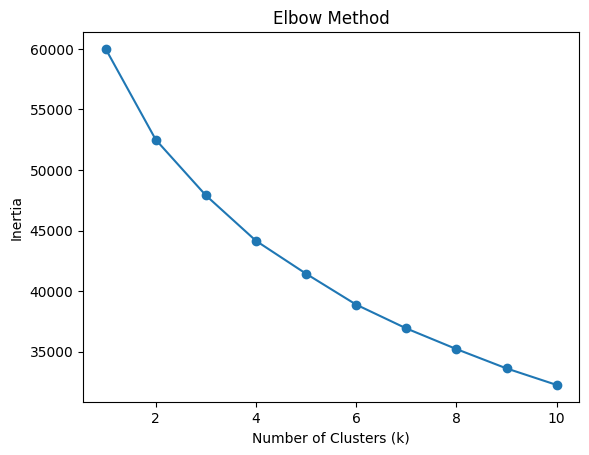

In [39]:
import warnings
warnings.filterwarnings('ignore')
inertia=[]
k_range=range(1,11)

for k in k_range:
    kmeans= KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [40]:
#Applying K-Means clustering with k=7 (as an example)
k = 7
kmeans = KMeans (n_clusters=k,random_state=42)
data['cluster']=kmeans.fit_predict(data_scaled)
print(data.head())

   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  cluster  
0        84.723658        6  
1        49.451704        5  
2        19.546561        6  
3        73.664179        4  
4        41.867814        6  


In [41]:
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.12205646149181477


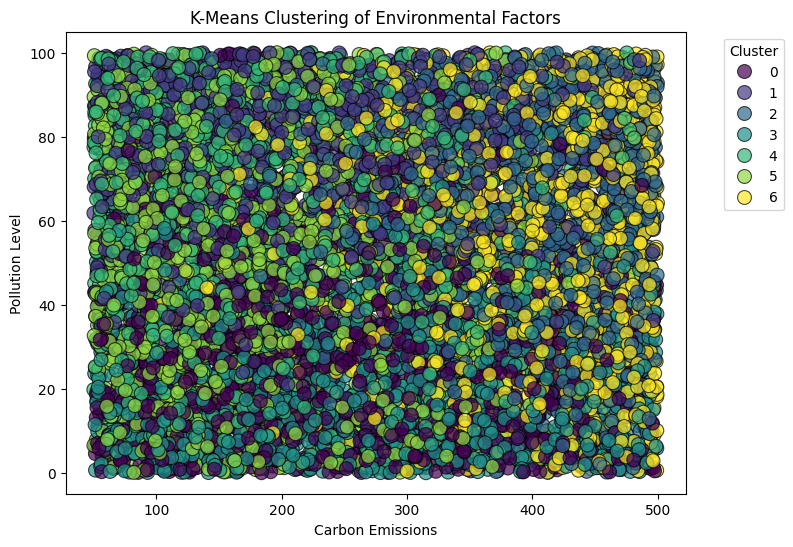

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.scatterplot(x='carbon_emissions',y='pollution_level',hue='cluster',
               data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('K-Means Clustering of Environmental Factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()